# Krystyn Gutu | Deep Learning | Project 3
###  DL Model (based on NNs) that Provides Reliable & Improved Accuracy of an Image Recognition Classifier (based on CNNs) | Monday, December 19, 2022

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
import tensorflow_data_validation as tfdv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Upload pictures

In [2]:
pet_photo_dir = 'PetImages'

In [3]:
pet_photos = tf.keras.preprocessing.image_dataset_from_directory(pet_photo_dir)

Found 23422 files belonging to 2 classes.


In [4]:
pet_photos.class_names

['Cat', 'Dog']

In [5]:
for image_batch, labels_batch in pet_photos:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


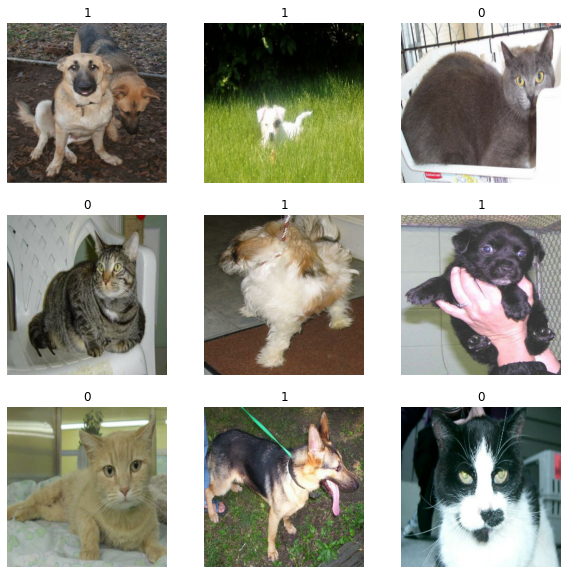

In [6]:
plt.figure(figsize = (10,10))
for images, labels in pet_photos.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

In [7]:
batch_size = 64
image_height = 256
image_width = 256

In [8]:
import os

num_skipped = 0
for folder_name in ('Cat', 'Dog'):
    folder_path = os.path.join(pet_photo_dir, folder_name)
    for folder in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder)
        try:
            fobj = open(folder, 'rb')
            is_jfif = tf.compat.as_bytes('JFIF') in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            
            os.remove(folder)
            
            
print('Deleted %d images' % num_skipped)

Deleted 0 images


In [9]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (image_height, image_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [10]:
train_dir = tf.keras.preprocessing.image_dataset_from_directory(pet_photo_dir, validation_split = 0.2,
                                                                subset = 'training', seed = 123, image_size =
                                                                (image_height, image_width), batch_size = batch_size)
validation_dir = tf.keras.preprocessing.image_dataset_from_directory(pet_photo_dir, validation_split = 0.2,
                                                                subset = 'validation', seed = 123, image_size =
                                                                (image_height, image_width), batch_size = batch_size)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


In [11]:
class_names = train_dir.class_names
print(class_names)

class_names = validation_dir.class_names
print(class_names)

['Cat', 'Dog']
['Cat', 'Dog']


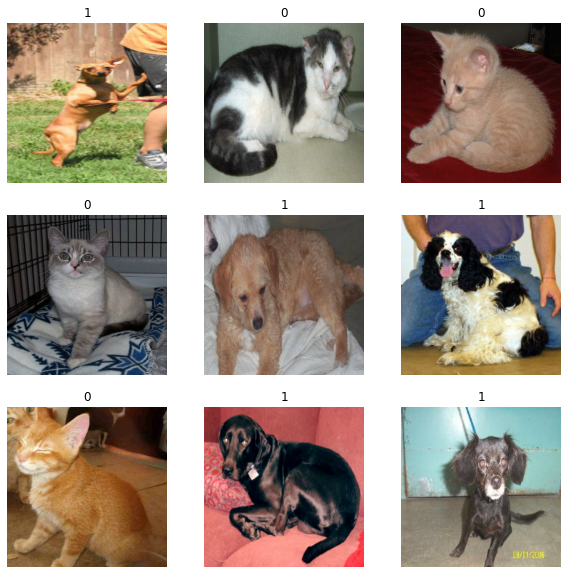

In [12]:
plt.figure(figsize = (10,10))
for images, labels in train_dir.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

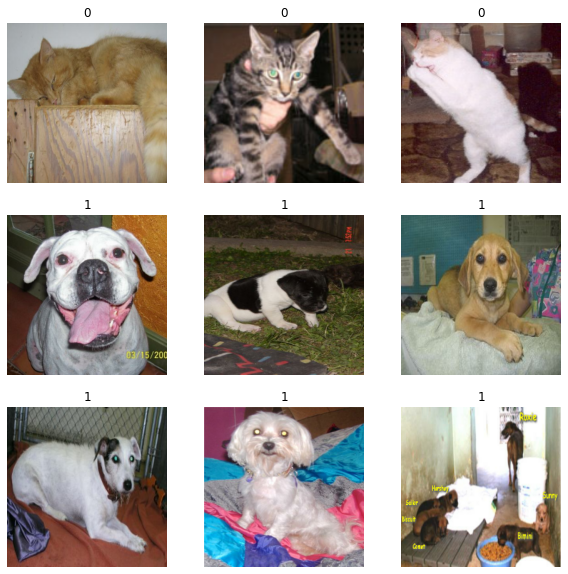

In [13]:
plt.figure(figsize = (10,10))
for images, labels in validation_dir.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

In [14]:
for image_batch, labels_batch in train_dir:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 256, 256, 3)
(64,)


# For comparing and contrasting, devise two CNN models:

## 1) A Keras Sequential Model with multiple Convolution and MaxPooling layers. Establish a ‘base’ model by creating a ‘home-grown’ image classifier.

In [15]:
## example

model = tf.keras.models.Sequential([tf.keras.layers.Rescaling(1./255),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [16]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])

In [ ]:
# Takes time for the 'fit' method to run... do NOT run it often

history = model.fit(train_dir, validation_data = validation_dir, epochs = 50)

Epoch 1/50
293/293 [==============================] - 2244s 8s/step - loss: 0.0000e+00 - accuracy: 0.5053 - val_loss: 0.0000e+00 - val_accuracy: 0.4893
Epoch 2/50
293/293 [==============================] - 2166s 7s/step - loss: 0.0000e+00 - accuracy: 0.5046 - val_loss: 0.0000e+00 - val_accuracy: 0.4893
Epoch 3/50
293/293 [==============================] - 2177s 7s/step - loss: 0.0000e+00 - accuracy: 0.5046 - val_loss: 0.0000e+00 - val_accuracy: 0.4893
Epoch 4/50
293/293 [==============================] - 2175s 7s/step - loss: 0.0000e+00 - accuracy: 0.5046 - val_loss: 0.0000e+00 - val_accuracy: 0.4893
Epoch 5/50
293/293 [==============================] - 2184s 7s/step - loss: 0.0000e+00 - accuracy: 0.5046 - val_loss: 0.0000e+00 - val_accuracy: 0.4893
Epoch 6/50
293/293 [==============================] - 2171s 7s/step - loss: 0.0000e+00 - accuracy: 0.5046 - val_loss: 0.0000e+00 - val_accuracy: 0.4893
Epoch 7/50
293/293 [==============================] - 2167s 7s/step - loss: 0.0000e+00 -

In [ ]:
model.summary()

In [ ]:
model.evaluate(validation_dir)

In [ ]:
keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_activations = True)

## 2) Make use of a pre-trained model. Use the very powerful image recognition classifier InceptionV3 model.

In [ ]:
inception_v3_weights = 'inception_v3_weights.h5'
print(type(inception_v3_weights))
print(' ')
print(inception_v3_weights)

In [ ]:
InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = None)

In [ ]:
pre_trained_model.save('inception_v3_weights.h5')

In [ ]:
pre_trained_model

In [ ]:
pre_trained_model.summary()

In [ ]:
original_weights = pre_trained_model.get_weights()

In [ ]:
n_layers = 0
for layer in pre_trained_model.layers:
    print(layer)
    n_layers += 1

print('Total # of Layers in the InceptionV3 Model =', n_layers)

In [ ]:
# This is the 'Input Layer'

pre_trained_model.layers[0]

In [ ]:
print('Layer Name = ', pre_trained_model.layers[0])
print(' ')
pre_trained_model.layers[0].get_weights()

In [ ]:
# This is the 1st 'Hidden Layer'

print('Layer Name = ', pre_trained_model.layers[1])
print(' ')
pre_trained_model.layers[1].get_weights()

# same as pre_trained_model.get_weights()[0]

In [ ]:
pre_trained_model.layers[1].get_weights()[0]

In [ ]:
pre_trained_model.layers[1].get_weights()[0][0]

In [ ]:
# This is a 32x32x32 cursor, meaning there are 96 weights

pre_trained_model.layers[1].get_weights()[0][0][0]

In [ ]:
pre_trained_model.layers[1].get_weights()[0][0][0][0]

In [ ]:
pre_trained_model.get_weights()[0][0][0][0]

In [ ]:
pre_trained_model.get_weights()[0][0][0][1]

In [ ]:
pre_trained_model.get_weights()[0][0][0][2]

In [ ]:
pre_trained_model.load_weights(inception_v3_weights)
pre_trained_model.get_weights()[0][0][0][2]

In [ ]:
pre_trained_model.summary()

In [ ]:
# 'Freezing' the layers of the model

for layer in pre_trained_model.layers:
    layer.trainable = False
  
pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')

print('Last layer output shape = ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)

In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)           

pt_model = Model(pt_model.input, x) 

In [ ]:
pt_model.compile(optimizer = RMSprop(learning_rate = 0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
# See below, there over 38 million trainable parameters

pt_model.summary()

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1. / 255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.)

# Training Models 1 & 2 on the 'Kaggle Cats and Dogs Dataset':

In [ ]:
dir_split = ['cats_and_dogs', 'cats_and_dogs/training', 'cats_and_dogs/testing', 'cats_and_dogs/training/cats',
            'cats_and_dogs/training/dogs', 'cats_and_dogs/testing/cats', 'cats_and_dogs/testing/dogs']

In [ ]:
import random
from shutil import copyfile

In [ ]:
def split_data(source, training, testing, split_size):
    all_files = []
    
    for file_name in os.listdir(source):
        file_path = source + file_name
        
        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, and is thus being ignored'.format(file_name))
            
    n_files = len(all_files)
    split_point = int(n_files * split_size)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(source + file_name, training + file_name)
        
        
cat_source_dir = 'PetImages/Cat'
training_cats_dir = 'cats_and_dogs/training/cats'
testing_cats_dir = 'cats_and_dogs/testing/cats'
dog_source_dir = 'PetImages/Dog'
training_dogs_dir = 'cats_and_dogs/training/dogs'
testing_dogs_dir = 'cats_and_dogs/testing/dogs'

split_size = 0.8
split_data(cat_source_dir, training_cats_dir, testing_cats_dir, split_size)
split_data(dog_source_dir, training_dogs_dir, testing_dogs_dir, split_size)

In [ ]:
print(len(os.listdir('cats_and_dogs/training/cats/')))
print(len(os.listdir('cats_and_dogs/training/dogs/')))
print(len(os.listdir('cats_and_dogs/testing/cats/')))
print(len(os.listdir('cats_and_dogs/testing/dogs/')))

In [ ]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

print('train_cats_dir path is : ', train_cats_dir)
print('train_dogs_dir path is : ', train_dogs_dir)

In [ ]:
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('validation_cats_dir path is : ', validation_cats_dir)
print('validation_dogs_dir path is : ', validation_dogs_dir)

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames

In [ ]:
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary',
                                                    subset = 'training', target_size = (150, 150))     

In [ ]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary',
                                                         target_size = (150, 150))

In [ ]:
# Takes time for the 'fit' method to run... do NOT run it often

pt_history = pt_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 20,
                          validation_steps = 50, verbose = 2)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy - Base Model')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
acc = pt_history.history['accuracy']
val_acc = pt_history.history['val_accuracy']
loss = pt_history.history['loss']
val_loss = pt_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy - Inception Pre-Trained Model')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
pt_history_df = pd.DataFrame(pt_history.history)
pt_history_df.loc[:, ['loss', 'val_loss']].plot()
pt_history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
from keras.preprocessing import image
  
# input image
test_image = image.load_img('1.jpg', target_size = (200, 200))
  
# display image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
  
result = model.predict(test_image)
  
# mapping the array with the main name list
i = 0
if(result >= 0.5):
  print('Dog')
else:
  print('Cat')

In [ ]:
test_image = image.load_img('test/2.jpg', target_size = (200, 200))
  
# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
  
result = model.predict(test_image)

# mapping the array with the main name list
i = 0
if(result >= 0.5):
    print('Dog')
else:
    print('Cat')